In [3]:
import torch
import matplotlib.pyplot as plt

# 多层感知机
## 隐藏层
### 线性模型的缺陷
线性模型的缺陷在于: 
1. 线性表示单调, 如果一个特征对应的权重为正, 那么这一个特征的增大就会导数模型的输出线性增大 ; 但是这一种 **线性** 有时候不是那么合理, 比如根据体温来衡量一个人的身体状况, 很明显, 对于体温这一项, 当体温 < 37度的时候温度越高身体状况越好, 当体温 >= 37 度的时候, 问题越低越好, 所以这一种情况下使用线性模型就会带来一定的误差
2. 线性模型表示每一个特征的 **"分隔"**, 比如对于一个图像数据, 每一个像素点作为一个特征, 并且占用一定的权重, 此时就会忽略掉一个像素点与其他像素点之间的关系, 从而可能导致一定的误差
### 在网络中加入隐藏层
可以在网络中假如一个或者多个隐藏层来克服线性模型的缺陷, 从而处理更加普遍的函数关系 ; 最简单的方法是把很多全连接层堆叠在一起, 每一层都输出到上面的层, 直到最后的输出, 整体架构如下:
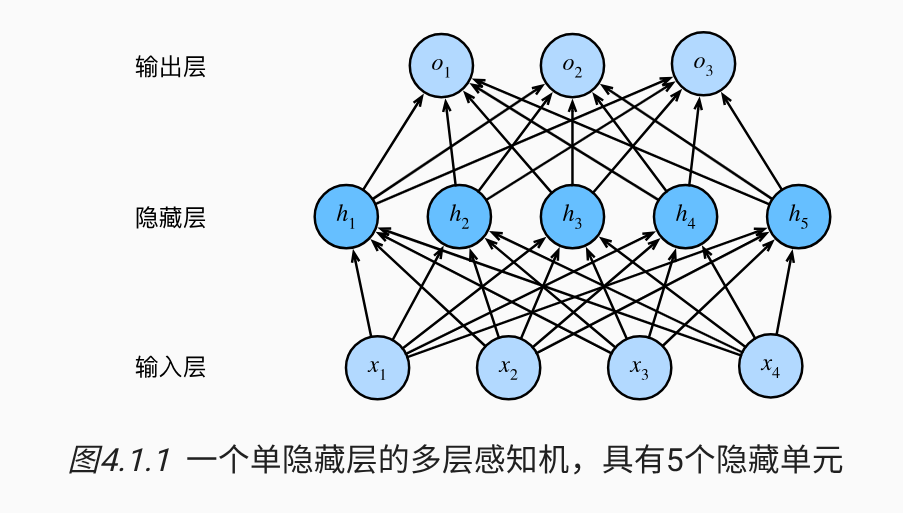
这一种架构叫做 **多层感知机**(`MLP`)
### 从线性到非线性
> 思考一个问题: 为什么需要激活函数, 如果没有激活函数的后果是什么?

假设输入的数据为 $\mathbf{X} \in \mathbb{R}^{n \times d}$ 表示 $n$ 个样本的小批量数据, 并且每一个数据有 $d$ 个特征 ; 对于具有 $h$ 个隐藏单元的单隐藏层多层感知机, 使用 $\mathbf{H} \in \mathbb{R}^{n \times h}$来表示隐藏层的输出(其中 $\mathbf{H}$ 也叫做隐藏层变量) ; 同时假设隐藏层权重 $\mathbf{W}^{(1)} \in \mathbb{R}^{d \times h}$ 和隐藏层偏置 $\mathbf{b}^{(1)} \in \mathbb{R}^{1 \times h}$ 以及输出层权重 $\mathbf{W}^{(2)} \in \mathbb{R}^{h \times q}$和输出层偏置 $\mathbf{b}^{(2)} \in \mathbb{R}^{1 \times q}$, 所以此时输出为 $\mathbf{O} \in \mathbb{R}^{n \times q}$, 那么此时如果都使用线性模型那么可以得到:
$$
\mathbf{H} = \mathbf{X}\mathbf{W}^{(1)} + \mathbf{b}^{(1)}
$$

$$
\mathbf{O} = \mathbf{H}\mathbf{W}^{(2)} + \mathbf{b}^{(2)}
$$
如果没有激活函数那么可以得到:
$$
\mathbf{O} = (\mathbf{X} \mathbf{W}^{(1)} + \mathbf{b}^{(1)}) \mathbf{W}^{(2)} + \mathbf{b}^{(2)} = \mathbf{X} \mathbf{W}^{(1)} \mathbf{W}^{(2)} + \mathbf{b}^{(1)} \mathbf{W}^{(2)} + \mathbf{b}^{(2)} = \mathbf{X} \mathbf{W} + \mathbf{b}
$$
所以此时无论多少层全连接层, 最终都等效一个单层模型, 没什么意义, 所以需要在隐藏层加入 **激活函数**($\sigma$) , 激活函数的输出称为**活性值**, 利用激活函数就可以放置多层感知机退化成线性模型:
$$
\begin{align*}
\mathbf{H} &= \sigma(\mathbf{X} \mathbf{W}^{(1)} + \mathbf{b}^{(1)}), \\
\mathbf{O} &= \mathbf{H} \mathbf{W}^{(2)} + \mathbf{b}^{(2)}.
\end{align*}
$$
同时为了构建更加通用的多层感知机, 可以继续堆叠隐藏层, 每一层也可以使用不同的激活函数
### 通用近似定理
利用 `MLP` 可以逼近多种函数, 同时如果使用更深的网络可以逼近更多更加复杂的函数, 可以看一下这一片文章: https://zhuanlan.zhihu.com/p/53371502

## 激活函数
激活函数通过加权计算并且加上偏置来确定神经元是否应该被激活, 它们可以把输入信号转换为输出的可微信号, 大多数激活函数都是非线性的, 下面介绍一些常见的激活函数
### ReLU
`ReLU`函数定义如下:
$$
ReLU(x) = max(x, 0)
$$

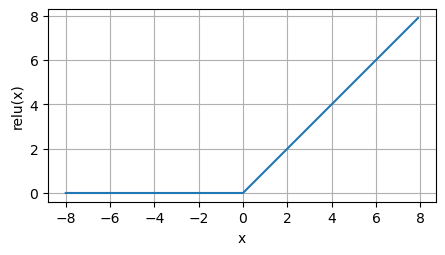

In [15]:
# ReLU 函数
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = torch.relu(x)
plt.figure(figsize=(5, 2.5))
plt.plot(x.detach().numpy(), y.detach().numpy())
plt.xlabel('x')
plt.ylabel('relu(x)')
plt.grid()
plt.show()

输入为负的时候, `ReLU`函数的导数 `0`, 输入为正的时候, `ReLU`函数的导数为 `1`. 如果输入值精确等于 `0`, 那么使用左侧的导数(**“如果微妙的边界条件很重要，我们很可能是在研究数学而非工程”**)

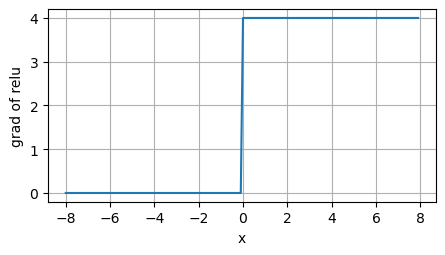

In [14]:
# ReLU 导数
# 
y.backward(torch.ones_like(x), retain_graph=True)
plt.figure(figsize=(5, 2.5))
plt.plot(x.detach(), x.grad)
plt.xlabel('x')
plt.ylabel('grad of relu')
plt.grid()
plt.show()

使用 `ReLU` 的原因: 求导表现良好, 要么让参数消失, 要么让参数通过, 并且解决了 **神经网络的梯度消失问题** (???)

同时 `ReLU`存在各种变种函数, 比如参数化 `ReLU`(`pReLU`), 也就是即使参数为负数, 某些信息依然可能通过:
$$
pReLU(x) = max(0, x) + \alpha min(0, x)
$$

**细节补充**:
```Python
y.backward(torch.ones_like(x), retain_graph=True)
```
其中 `torch.ones_like(x)` 表示对于 $y$ 中每一个元素的权重, 此时权重都为 $1$, 那么对于 $x$ 中单个元素 $x_{j}$, 导数为 $\frac{\partial(y_1 + y_2 + ... + y_n)}{\partial x_j}$, 所以最终得到的就是 $y$ 中每一个元素对于 $x$ 中每一个元素的导数组成的矩阵

### sigmoid函数
对于一个定义域 $\mathbb{R}$中的输入, `sigmoid`函数将输入变换为区间 `(0, 1)`上的输出, `sigmoid`函数可以把范围 (-inf, inf)中任意输入压缩到区间 (0, 1)中的某个值:
$$
sigmoid(x) = \frac{1}{1 + \exp(-x)}
$$

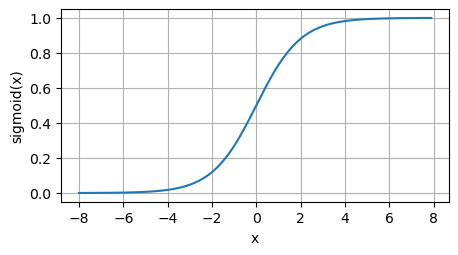

In [17]:
# sigmoid 函数
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = torch.sigmoid(x)
plt.figure(figsize=(5, 2.5))
plt.plot(x.detach(), y.detach())
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.grid()
plt.show()

`sigmoid`函数的导数如下:
$$
\frac{d \ sigmoid(x)}{dx} = \frac {\exp(-x)}{(1 + \exp(-x))^2} = sigmoid(x)(1 - sigmoid(x))
$$

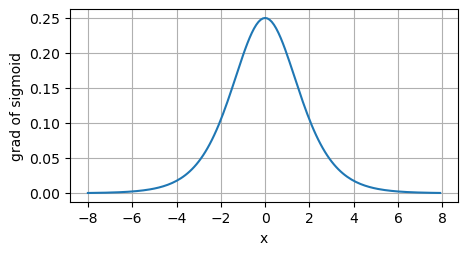

In [23]:
# sigmoid 函数的导数
x.grad = None # 清除梯度
y.backward(torch.ones_like(x), retain_graph=True)
plt.figure(figsize=(5, 2.5))
plt.plot(x.detach(), x.grad)
plt.xlabel('x')
plt.ylabel('grad of sigmoid')
plt.grid()
plt.show()

### tanh函数
`tanh`函数也可以把输入压缩转换到区间 (-1, 1) 上, 公式如下:
$$
tanh(x) = \frac{1 - \exp{(-2x)}}{1 + \exp{(-2x)}}
$$

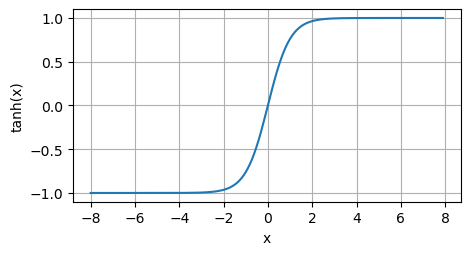

In [25]:
# tanh 图像
y = torch.tanh(x)
plt.figure(figsize=(5, 2.5))
plt.plot(x.detach(), y.detach())
plt.xlabel('x')
plt.ylabel('tanh(x)')
plt.grid()
plt.show()

`tanh`函数的到函数求解如下:
$$
\frac{d}{dx} tanh(x) = 1 - {(tanh(x))}^2
$$

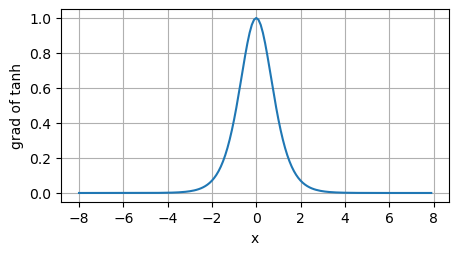

In [28]:
# tanh(x) 导数图像
x.grad = None
y.backward(torch.ones_like(x), retain_graph=True)
plt.figure(figsize=(5, 2.5))
plt.plot(x.detach(), x.grad)
plt.xlabel('x')
plt.ylabel('grad of tanh')
plt.grid()
plt.show()

## 思考
> 为什么 `ReLu, sigmoid, tanh` 等函数可以作为激活函数, 什么情况下应该选择什么函数?

首先思考激活函数的作用: 对于隐藏层的输出起作用, 也就是激活隐藏层输出 ; 可以发现激活函数其实起到了构造非线性模型的作用, **可以根据不同模型的特点(比如人的体温与健康状况)选择合适的激活模型, 使得输入特征变换不同的时候, 输出也呈现对应的非线性变换** , 比如 `sigmoid` 函数在 `0` 的位置增长速度最快, 逐渐远离 `0` 的位置增长速度比较慢